# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
data = pd.read_csv('/datasets/real_estate_data.csv',sep='\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [2]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


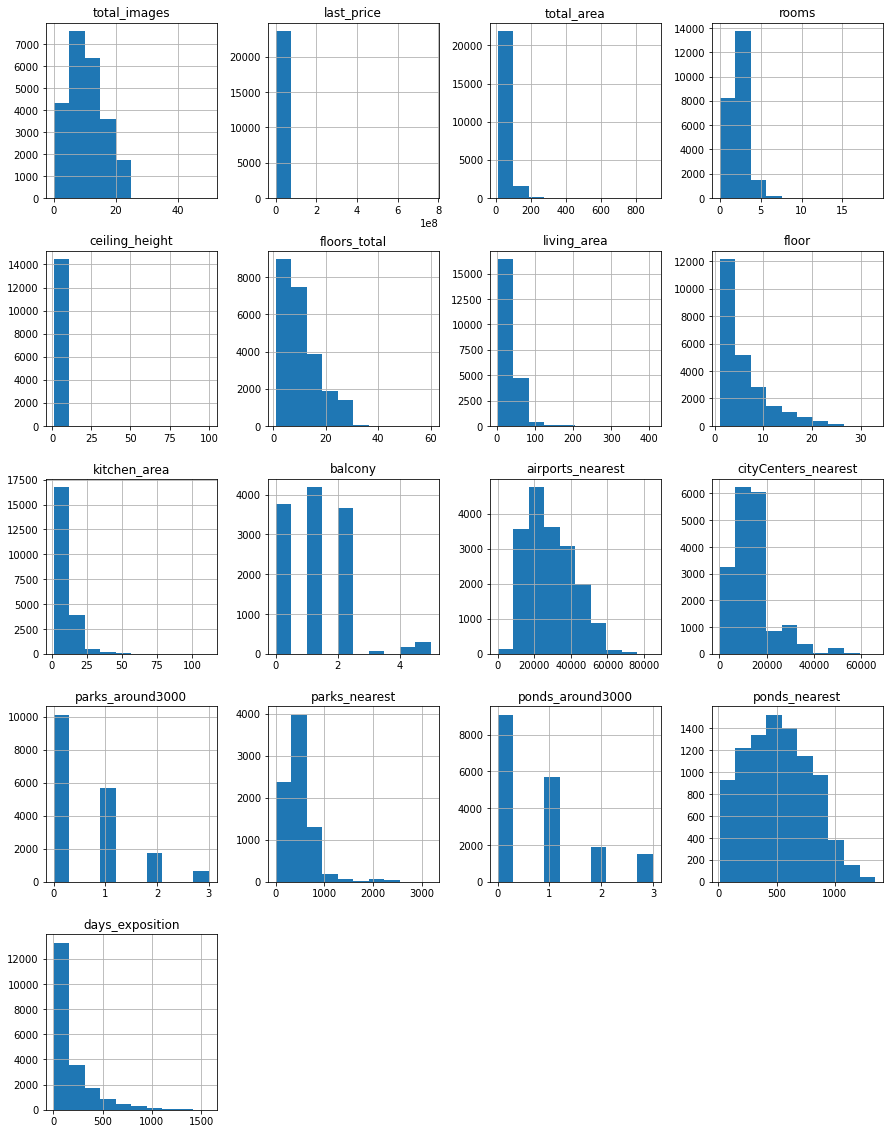

In [3]:
data.hist(figsize=(15, 20))
plt.show()

**Вывод:**

Загрузили файл, исходя из данных имеем датафрейм с 23699 строк и 22 столбцами.
Построили гистаграмы для всем числовых столбцов.

### Предобработка данных

In [4]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [5]:
data['balcony']  = data['balcony'].fillna(data['balcony'].median())

In [6]:
data['locality_name'] = data['locality_name'].fillna('Неизвестно')

In [7]:
data['is_apartment'] = data['is_apartment'].fillna(False)

In [8]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [9]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В датафрейме имеем пропущенные данные по стобцам ceiling_height , floors_total, living_area, is_apartment, kitchen_area, locality_name и во всех картографических данных добавленных автоматически.
Заменим пропущенные значения в балконах на '0' , потому что возможно ,если пропущены, значит они могут отсутствовать.
С потолками, заменим на медианное значение, имеются неявные дубликаты, окоторые присреднем исказят данные.

In [10]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%d %H:%M:%S')

In [11]:
data['balcony'] = data['balcony'].astype('int')
data['rooms'] = data['rooms'].astype('int')
data['floor'] = data['floor'].astype('int')


In [12]:
data.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

Изменили тип столбца 'first_day_exposition' с object  на тип формата даты. И столбцы с целыми числами без пропусков на int.

In [13]:
data['locality_name'].value_counts()

Санкт-Петербург               15721
посёлок Мурино                  522
посёлок Шушары                  440
Всеволожск                      398
Пушкин                          369
                              ...  
поселок Севастьяново              1
деревня Трубников Бор             1
коттеджный поселок Счастье        1
деревня Пикколово                 1
посёлок Мыза-Ивановка             1
Name: locality_name, Length: 365, dtype: int64

In [14]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [15]:
data['locality_name'] = data['locality_name'].str.replace('ё','е')


In [16]:
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'поселок')

In [17]:
data['locality_name'] = data['locality_name'].str.replace('городской посёлок', 'поселок')

In [18]:
data['locality_name'] = data['locality_name'].str.replace('посёлок городского типа', 'поселок')

In [19]:
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок')
#я пытался сделать листом, словарем, кортежом, но выдает ошибку.unhasheble list или ошибку с патерном в случае с кортежом

In [20]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок Красный Бор', 'Гатчина', 'деревня Федоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'поселок Металлострой', 'поселок Лебяжье', 'поселок Сиверский',
       'поселок Молодцово', 'поселок Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок Ефимовский', 'поселок Плодовое', 'деревня Заклинье',
       'поселок Торковичи', 'поселок Первомайское', 'Красное Село',
       'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольское', 'Зелено

Работа с неявными дубликатами в столбце 'locality_name'. 

In [21]:
data['ceiling_height'].unique()

array([  2.7 ,   2.65,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   3.2 ,   2.61,   3.25,
         3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,   3.3 ,
         2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,   3.4 ,
         3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,   2.58,
         3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.16,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,
         2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,
         4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,
         3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,
         3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,
         3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
        32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.26,
      

In [22]:
data.loc[data['ceiling_height']>10,'ceiling_height'] = data['ceiling_height'] / 10

В столбце 'ceiling_height' встретились ошибочно записанные данные по типу высота потолка 32 метра, такие данные разделили на 10, очедвино , что тут ошибка

In [23]:
data['rooms'].median()

2.0

In [24]:
data['rooms'] = data['rooms'].replace(0,2)

In [25]:
data = data.query('12<total_area<900')
data = data.query('300000<last_price<10000000')
data = data.query('2<ceiling_height<8')
data = data.query('floors_total<50')
data = data.query('rooms<8')

In [26]:
data.shape

(20822, 22)

**Вывод**

**1.** Выявили пропущенные значения, изменили их, где это уместно.

**2.** Изменили неявные дубликаты в столбцах 'locality_name' , 'ceiling_height' , 'rooms'.

**3.** Отфильтрофали данные в стобцах с жилой площадью, ценой квартир , высотой потлков, и общик количество этажей в доме, исключая выбросы

### Посчитайте и добавьте в таблицу новые столбцы

In [27]:
data['price_one_square_meter'] = data['last_price'] / data['total_area']
data['price_one_square_meter'] = data['price_one_square_meter'].round(2)
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_square_meter
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.6,1,False,...,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.3,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.4,5,False,...,1,поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.79
6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.6,6,False,...,1,поселок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195.71
7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,NaN,22,False,...,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110544.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23693,9,4600000.0,62.40,2016-08-05,3,2.60,9.0,40.0,8,False,...,0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0,73717.95
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,1,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,72490.85
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5.0,38.0,4,False,...,1,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,52542.37
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3.0,29.7,1,False,...,1,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44091.71


Добавлен новый столбец 'price_one_square_meter'. Имеет данные о цене квадратного метра.

In [28]:
data['week_days'] = data['first_day_exposition'].dt.weekday

Добавлен новый столбец 'week_days'. Отоброжает дни недели, где начало понедельник - '0' , конец воскресеьне - '6'

In [29]:
data['month_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month

Добавлен новый столбец 'month_exposition'. Нумерация месяцев в году.

In [30]:
data['year_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year

Добавлен новый столбец 'year_exposition' , который отображает год.

In [31]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_square_meter,week_days,month_exposition,year_exposition
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,2018
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,...,NaN,NaN,NaN,NaN,NaN,55.0,95065.79,0,9,2018
6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,...,19143.0,0.0,NaN,0.0,NaN,155.0,99195.71,3,11,2017
7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,NaN,22,False,...,11634.0,0.0,NaN,0.0,NaN,NaN,110544.69,3,4,2019
8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,...,NaN,NaN,NaN,NaN,NaN,189.0,87454.76,2,5,2018
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,15008.0,0.0,NaN,0.0,NaN,289.0,88524.59,6,2,2017
10,5,5050000.0,39.60,2017-11-16,1,2.67,12.0,20.30,3,False,...,13878.0,1.0,310.0,2.0,553.0,137.0,127525.25,3,11,2017
11,9,3300000.0,44.00,2018-08-27,2,2.65,5.0,31.00,4,False,...,51677.0,0.0,NaN,0.0,NaN,7.0,75000.00,0,8,2018
12,10,3890000.0,54.00,2016-06-30,2,2.65,5.0,30.00,5,False,...,NaN,NaN,NaN,NaN,NaN,90.0,72037.04,3,6,2016


In [32]:
def floor_type(x):
    if x['floor'] == 1:
        return 'Первый'
    elif x['floor']==x['floors_total']:
        return 'Последний'
    return 'Другой'

Объявляем функцию, с помощью которой будем категоризировать столбец 'floor'

In [33]:
data['floors_type'] = data.apply(floor_type,axis=1)
data['floors_type'].value_counts()

Другой       15173
Последний     2891
Первый        2758
Name: floors_type, dtype: int64

Добавляем новый столбец 'floors_type' , с категориями столбца 'floor'

In [34]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest'] / 1000
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].round(0)
data['cityCenters_nearest_km'].head()

1    19.0
2    14.0
5     NaN
6    19.0
7    12.0
Name: cityCenters_nearest_km, dtype: float64

Добавляем новый столбец 'cityCenters_nearest_km', где мы конвертировали метры из столбца 'cityCenters_nearest' в км.

**Вывод**

**1.** Добавили столбцы с днями неделями, месяцами, и годами.

**2.** Рассчитали цену за квадратный метр и результаты добавили в новый столбец.

**3.** Сделали категоризацию данных из столбца 'floors' на "Первый, Последний, Другие" и добавили результат в столбец 'floors_type'

### Проведите исследовательский анализ данных

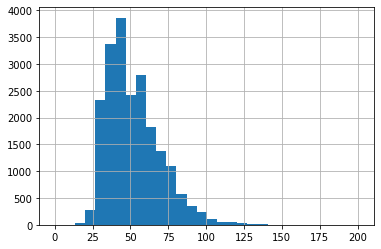

count    20822.000000
mean        52.025033
std         17.710422
min         13.000000
25%         38.700000
50%         48.000000
75%         62.000000
max        201.500000
Name: total_area, dtype: float64

In [35]:

data['total_area'].hist(bins=30,range=(0,201))
plt.show()
data['total_area'].describe()

По данным видим , что большинство квартир в нашем датафрейме имеют общую площадь около 50м2.
После 60ти м2 идет спад.

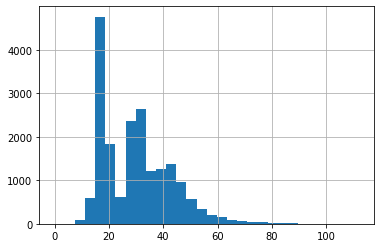

count    19226.000000
mean        29.842524
std         12.741089
min          2.000000
25%         18.000000
50%         29.000000
75%         38.400000
max        112.000000
Name: living_area, dtype: float64

In [36]:
data['living_area'].hist(bins=30,range=(0,112))
plt.show()
data['living_area'].describe()



На гистограмме видно , что большинство жилой площади имеют 18 м2, в два раза меньше 30 м2  и идет спад  на 40 м2.

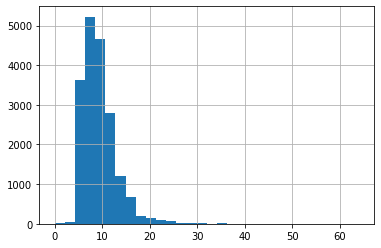

count    18856.000000
mean         9.431402
std          3.617187
min          1.300000
25%          7.000000
50%          9.000000
75%         11.000000
max         64.000000
Name: kitchen_area, dtype: float64

In [37]:

data['kitchen_area'].hist(bins=30,range=(0,64))
plt.show()
data['kitchen_area'].describe()


Исходя из данных наблюдаем ,что явное большиство объектов имеют кухонную площадь 9-10 м2.

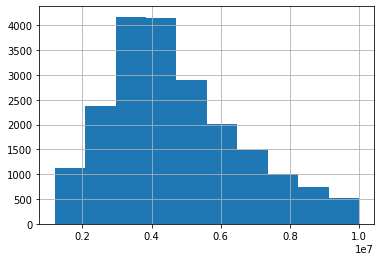

count    2.082200e+04
mean     4.634154e+06
std      1.948235e+06
min      4.300000e+05
25%      3.300000e+06
50%      4.300000e+06
75%      5.800000e+06
max      9.999999e+06
Name: last_price, dtype: float64

In [38]:
data['last_price'].hist(range=(1200000,10000000))
plt.show()
data['last_price'].describe()


Большинство стоимость квартир составляет 4.3 миллиона, есть и самая дорогая за почти 10 миллионов.

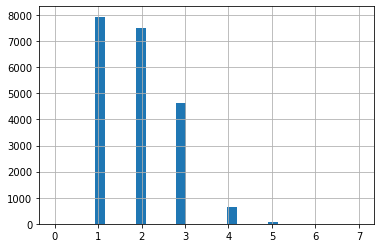

count    20822.000000
mean         1.917059
std          0.874360
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

In [39]:
data['rooms'].hist(bins=30,range=(0,7))
plt.show()
data['rooms'].describe()

Однокомнатные и двухкомнатные квартиры доминируют.

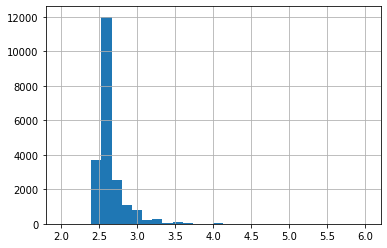

count    20822.000000
mean         2.667171
std          0.175015
min          2.200000
25%          2.600000
50%          2.650000
75%          2.650000
max          5.800000
Name: ceiling_height, dtype: float64

In [40]:
data['ceiling_height'].hist(bins=30,range=(2,6))
plt.show()
data['ceiling_height'].describe()

Большое количество квартир с высотой потолков выходит на 2.6, что являеется нормой.

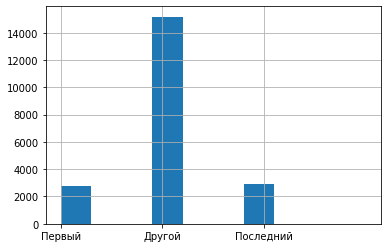

count      20822
unique         3
top       Другой
freq       15173
Name: floors_type, dtype: object

In [41]:
data['floors_type'].hist(bins=10,range=(0,3))
plt.show()
data['floors_type'].describe()

Квартиры на первом и последнем этажах почти одинаково, но сильно отличается от количества квартир на других этажах.

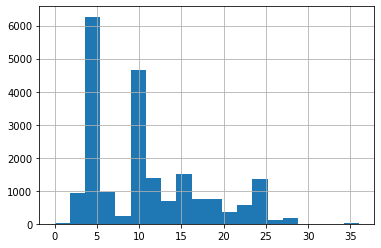

count    20822.000000
mean        10.726107
std          6.605122
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         36.000000
Name: floors_total, dtype: float64

In [42]:
data['floors_total'].hist(bins=20,range=(0,36))
plt.show()
data['floors_total'].describe()


Большинство квартир продается 5ти и 10ти этажных зданиях.

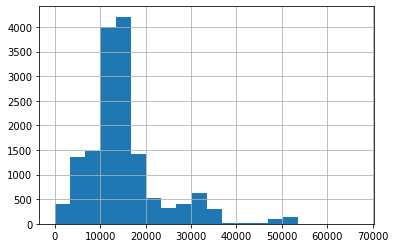

count    15367.000000
mean     15223.879026
std       8549.151232
min        208.000000
25%      10875.500000
50%      13801.000000
75%      16804.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

In [43]:
data['cityCenters_nearest'].hist(bins=20,range=(0,67000))
plt.show()
data['cityCenters_nearest'].describe()

Большинство квартир находятся в 13-15 км от центра.

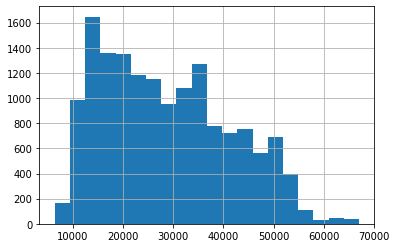

count    15355.000000
mean     28981.904135
std      13080.543139
min          0.000000
25%      17951.500000
50%      27179.000000
75%      37864.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [44]:
data['airports_nearest'].hist(bins=20,range=(6450,67000))
plt.show()
data['airports_nearest'].describe()

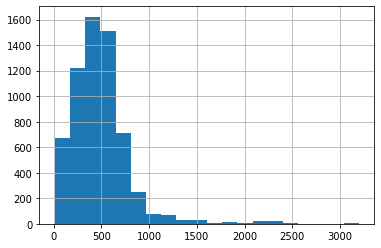

count    6290.00000
mean      486.66248
std       321.62705
min         1.00000
25%       290.00000
50%       456.00000
75%       612.00000
max      3190.00000
Name: parks_nearest, dtype: float64

In [45]:
data['parks_nearest'].hist(bins=20,range=(11,3200))
plt.show()
data['parks_nearest'].describe()

Отфильтровали столбец более 10ти метров.
Пик приходится на квартиры в 400 метрах от парка.

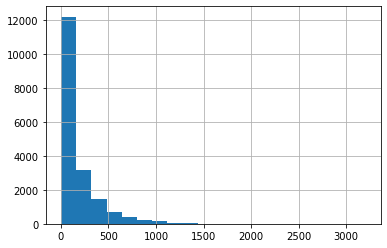

count    18343.00000
mean       170.89222
std        208.27780
min          1.00000
25%         43.00000
50%         90.00000
75%        217.00000
max       1580.00000
Name: days_exposition, dtype: float64

In [46]:
data['days_exposition'].hist(bins=20,range=(0,3200))
plt.show()
data['days_exposition'].describe()

В этом столбце имеем необычно долгие продажи и по данным становится понятно, что среднее значение сильно отличается от медианы.


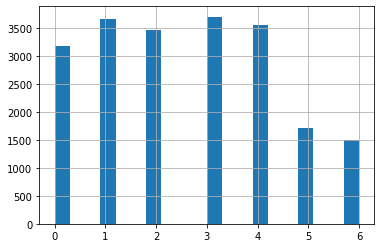

count    20822.000000
mean         2.574729
std          1.794216
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: week_days, dtype: float64

In [47]:
data['week_days'].hist(bins=20,range=(0,6))
plt.show()
data['week_days'].describe()

В выходные публикуют объявления реже чем в будни.

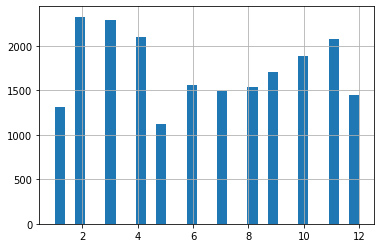

count    20822.000000
mean         6.394919
std          3.490879
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_exposition, dtype: float64

In [48]:
data['month_exposition'].hist(bins=30,range=(1,12))
plt.show()
data['month_exposition'].describe() 

В феврале больше всего публикаций , в мае наоборот.

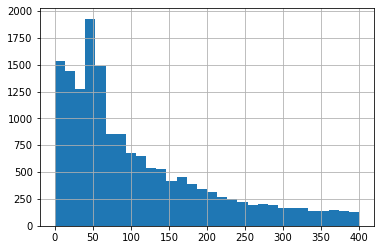

,days_exposition
median,90.00000
mean,170.89222


In [49]:
data['days_exposition'].hist(bins=30,range=(0,400))
plt.show()
data.agg({'days_exposition':['median','mean']})


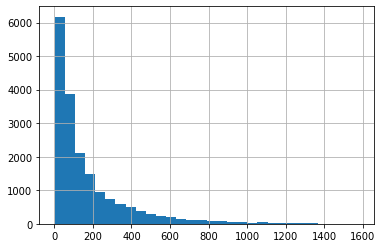

count    18343.00000
mean       170.89222
std        208.27780
min          1.00000
25%         43.00000
50%         90.00000
75%        217.00000
max       1580.00000
Name: days_exposition, dtype: float64

In [50]:
data['days_exposition'].hist(bins=30)
plt.show()
data['days_exposition'].describe()

В среднем продажа занимает 165 дней, но среднее достаточно большое, т.к. мы имеем большие выбросы , поэтому на гистограмме станет явно, что большое кол-во продаж выпадает на медианное значение , около 100 дней. За быстрые продажи можно принять знчение первого квартиля, за необычно долгие свыше 400 дней. Не стал отбрасывать данные с необычно долгими продажами, т.к такое вполне возможно.

0.6578549626143642

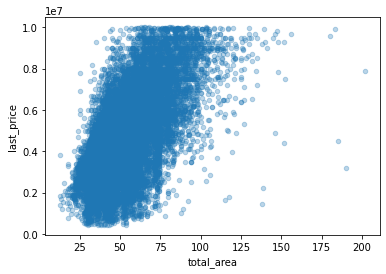

In [51]:
data.plot(x='total_area',y='last_price',kind='scatter',alpha=0.3)
data['last_price'].corr(data['total_area'])

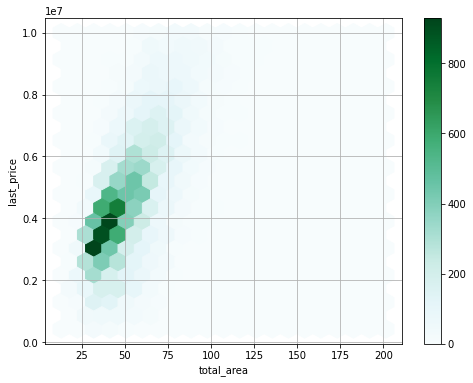

In [52]:
data.plot(x='total_area',y='last_price',kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
plt.show()

0.5423372242269136

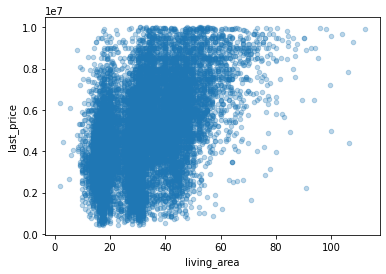

In [53]:
data.plot(x='living_area',y='last_price',kind='scatter',alpha=0.3)
data['last_price'].corr(data['living_area'])

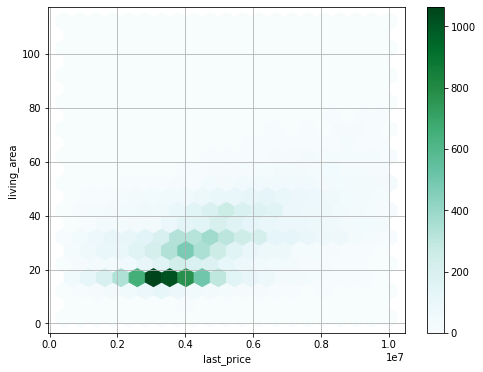

In [54]:
data.plot(x='last_price',y='living_area',kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
plt.show()

0.44500426234632423

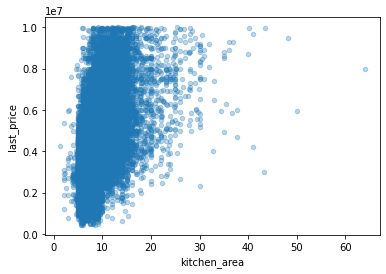

In [55]:
data.plot(x='kitchen_area',y='last_price',kind='scatter',alpha=0.3)
data['last_price'].corr(data['kitchen_area'])


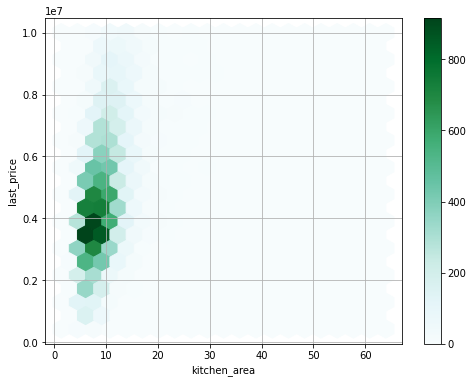

In [56]:
data.plot(x='kitchen_area',y='last_price',kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
plt.show()

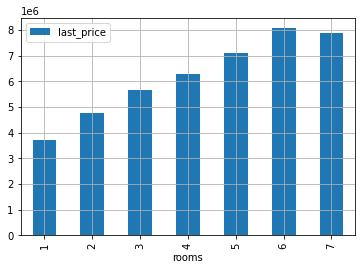

0.9818329379583977

In [57]:
price_mean_rooms = data.pivot_table(index='rooms', values='last_price', aggfunc='mean')
price_mean_rooms = price_mean_rooms.reset_index()
price_mean_rooms.plot(x='rooms', y='last_price', kind='bar',grid=True)
plt.show()
price_mean_rooms['last_price'].corr(price_mean_rooms['rooms'])

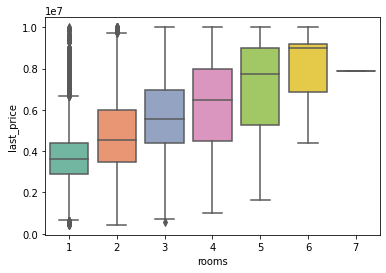

In [58]:
sns.boxplot(x='rooms', y='last_price', data=data, palette='Set2')
plt.show()

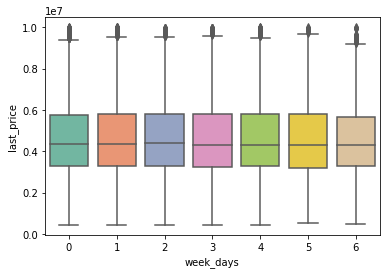

-0.016074149168721887

In [59]:
sns.boxplot(x='week_days', y='last_price', data=data, palette='Set2')
plt.show()
data['last_price'].corr(data['week_days'])

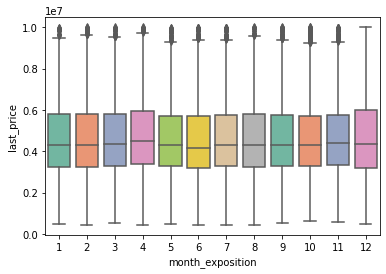

0.003445766319575182

In [60]:
sns.boxplot(x='month_exposition', y='last_price', data=data, palette='Set2')
plt.show()
data['last_price'].corr(data['month_exposition'])

0.00631905076598386

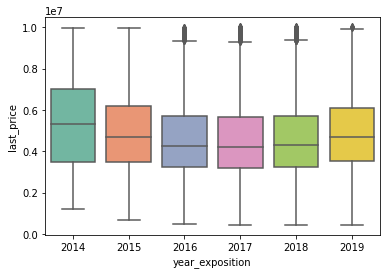

In [61]:
sns.boxplot(x='year_exposition', y='last_price', data=data, palette='Set2')
data['last_price'].corr(data['year_exposition'])

In [62]:
local_name = data.pivot_table(index='locality_name', values='price_one_square_meter', aggfunc=['count', 'mean'])
local_name.columns = ['count', 'mean']
local_name = local_name.sort_values(by='count',ascending=False)
local_name = local_name[:10]
local_name

,count,mean
locality_name,,
Санкт-Петербург,12985,104260.444801
поселок Мурино,552,85629.568641
поселок Шушары,436,78482.992982
Всеволожск,392,66710.842577
Колпино,336,75185.478244
Пушкин,330,99901.719788
поселок Парголово,327,90175.913089
Гатчина,305,68421.902525
деревня Кудрово,296,92222.428041


In [63]:
data_saintp_locality = data.query('"Санкт-Петербург" in locality_name').copy()
price_forkm_sainpt = data_saintp_locality.pivot_table(index='cityCenters_nearest_km', values='price_one_square_meter', aggfunc=('mean'))
price_forkm_sainpt['price_one_square_meter'] = price_forkm_sainpt['price_one_square_meter'].round(1)
price_forkm_sainpt

,price_one_square_meter
cityCenters_nearest_km,
0.0,111429.8
1.0,114838.3
2.0,110713.8
3.0,106935.1
4.0,112600.1
5.0,118755.9
6.0,120536.0
7.0,114928.4
8.0,113380.3


-0.9153345492197021

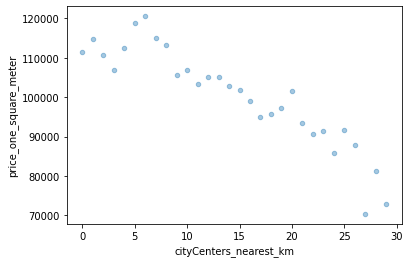

In [64]:
price_forkm_sainpt = price_forkm_sainpt.reset_index()
price_forkm_sainpt.plot(x='cityCenters_nearest_km',y='price_one_square_meter',kind='scatter',alpha=0.4)
price_forkm_sainpt['cityCenters_nearest_km'].corr(price_forkm_sainpt['price_one_square_meter'])

-0.9174877492503513

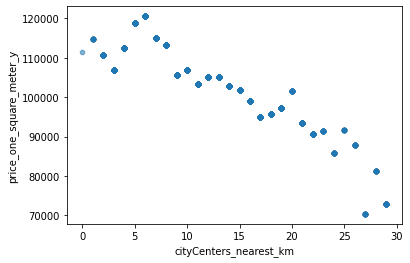

In [65]:
final_data = data.merge(price_forkm_sainpt, on='cityCenters_nearest_km', how='outer')
final_data.plot(x='cityCenters_nearest_km',y='price_one_square_meter_y',kind='scatter',alpha=0.1)
final_data['cityCenters_nearest_km'].corr(final_data['price_one_square_meter_y'])

**Вывод**

**1.** Изучили каждый параметр с помощью гистограммы и методом describe. Применили фильтр к столбцу 'total_area', т.к. он имел аномальные выбросы  в min  и max значениях. Применил фильт к 'ceiling_height' , т.к.  потолки в 1 метр и 8 метров не вписываются в описание квартир. Избавились от выбросов в столбце 'floors_total'.

**2.** Изучили как быстро продаются квартиры, в среднем это 169 дней, медианной значение это 95 дней. Бывают, что увартиры продаются через день, но и бывает необычно долго 1580 дней.

**3.** В иследованных параметрах видно зависимость параметров к цене объекта. Самая явная это у общей площади и цены объекта.

**4.** Определили средню стоимость км2 до центра в Санкт-Петербурге. На диаграмме рассеяния отчетлива видна зависимость стоимости объекта к расстоянию от центра.

### Общий вывод

**Подведем итоги**
* Выявили аномалии, такие как квартиры почти за миллиард рублей , площади почти одна тысяча квадртаных метров, потокли по восемь метров.
* Узнали что в среднем квартиры продаются 169 дней, медианное значение 95 дней.
* Определили что средняя цена квартир в регионе 4.5 миллиона рублей.
* Нашли зависимость стоимости объекта и его площади. Самая большая зависимость это у общей площади, чем больше она , тем больше цена.
* Большинство картир с 4мя и более комнатами дороже 4ех миллионов
* Определили , что цена за квадрат значительно падает , если объект отдаляется от центра.


